In [27]:
import pandas as pd
import os
import warnings
local_directory = '/Users/jiaxincui/Dropbox/on_device_DNN/project'
os.chdir(local_directory)
# To suppress a specific warning category
#warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# To suppress all warnings
warnings.filterwarnings('ignore')

In [55]:
all_data = pd.read_csv('data/raw_data/total_ver21_all.csv')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673503 entries, 0 to 2673502
Data columns (total 5 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Apk_name                 object
 1   Package                  object
 2   DL_framework             object
 3   REAL_Apk_name(app_id_x)  object
 4   Description              object
dtypes: object(5)
memory usage: 102.0+ MB


In [56]:
all_data[['app_name', 'version']] = all_data['Apk_name'].str.extract(r'(.*)\s([^\s]*\d+(?:\.\d+)*)')
all_data[['date', 'android_min_version']] = all_data['Description'].str.extract(r'(\w+ \d+, \d{4}) \· Android (\d+(?:\.\d+)*(?:\.\d+)*)\+')
#all_data = all_data.dropna(axis=0, how='any')
all_data = all_data[['app_name', 'version', 'Package', 'DL_framework', 'REAL_Apk_name(app_id_x)', 'date', 'android_min_version']]
all_data['date'] = pd.to_datetime(all_data['date'])
all_data = all_data[all_data['date'] >= pd.to_datetime('2015-07-01')]
all_data = all_data[all_data['date'] <= pd.to_datetime('2024-06-30')]
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2644337 entries, 0 to 2673502
Data columns (total 7 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   app_name                 object        
 1   version                  object        
 2   Package                  object        
 3   DL_framework             object        
 4   REAL_Apk_name(app_id_x)  object        
 5   date                     datetime64[ns]
 6   android_min_version      object        
dtypes: datetime64[ns](1), object(6)
memory usage: 161.4+ MB


In [57]:
non_dl_data = all_data[all_data['DL_framework'].isna()]
non_dl_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2639669 entries, 0 to 2673502
Data columns (total 7 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   app_name                 object        
 1   version                  object        
 2   Package                  object        
 3   DL_framework             object        
 4   REAL_Apk_name(app_id_x)  object        
 5   date                     datetime64[ns]
 6   android_min_version      object        
dtypes: datetime64[ns](1), object(6)
memory usage: 161.1+ MB


In [59]:
non_dl_data.to_csv('data/cleaned_data/non_dl_data.csv')

In [46]:
dl_data = all_data.dropna(axis=0, how='any')

dl_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4668 entries, 1993 to 2673031
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   app_name                 4668 non-null   object        
 1   version                  4668 non-null   object        
 2   Package                  4668 non-null   object        
 3   DL_framework             4668 non-null   object        
 4   REAL_Apk_name(app_id_x)  4668 non-null   object        
 5   date                     4668 non-null   datetime64[ns]
 6   android_min_version      4668 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 291.8+ KB


In [42]:
dl_data.head(50)

,app_name,version,Package,DL_framework,REAL_Apk_name(app_id_x),date,android_min_version
1993,Timestamp camera - PhotoPlace,5.1.22,com.facebook.ads.redexgen.X.EnumC0528Ma,onnx,air.byss.mobi.instaplacefree,2022-10-05,5.0
1994,Timestamp camera - PhotoPlace,5.1.22,com.facebook.ads.redexgen.X.EnumC0528Ma,ncnn,air.byss.mobi.instaplacefree,2022-10-05,5.0
3442,Calculator Photo Vault Hide P,10.5.0,com.couchbase.lite.ReplicatorChangeListenerToken,torch,com.getkeepsafe.morpheus,2021-07-26,5.1
3476,Calculator Photo Vault Hide P,10.5.0,com.couchbase.lite.ReplicatorChange,torch,com.getkeepsafe.morpheus,2021-07-26,5.1
3498,Calculator Photo Vault Hide P,10.5.0,com.couchbase.lite.AbstractReplicator,torch,com.getkeepsafe.morpheus,2021-07-26,5.1
3517,Calculator Photo Vault Hide P,10.5.0,com.couchbase.lite.ReplicatorChangeListener,torch,com.getkeepsafe.morpheus,2021-07-26,5.1
3644,FreePrints,3.61.1,org.apache.commons.io.IOUtils,torch,com.photoaffections.freeprints,2022-09-07,8.0
4075,FreePrints,3.61.1,okhttp3.internal.connection.RealCall,torch,com.photoaffections.freeprints,2022-09-07,8.0
4076,FreePrints,3.61.1,okhttp3.internal.connection.RealConnection,torch,com.photoaffections.freeprints,2022-09-07,8.0
4082,FreePrints,3.61.1,okhttp3.internal.connection.ConnectInterceptor,torch,com.photoaffections.freeprints,2022-09-07,8.0


In [40]:
dl_data['DL_framework'].unique()

array(['onnx', 'ncnn', 'torch', 'keras', 'cntk', 'caffe', 'tensorflow',
       'tensorflowlite', 'coreml', 'snpe', 'darknet'], dtype=object)

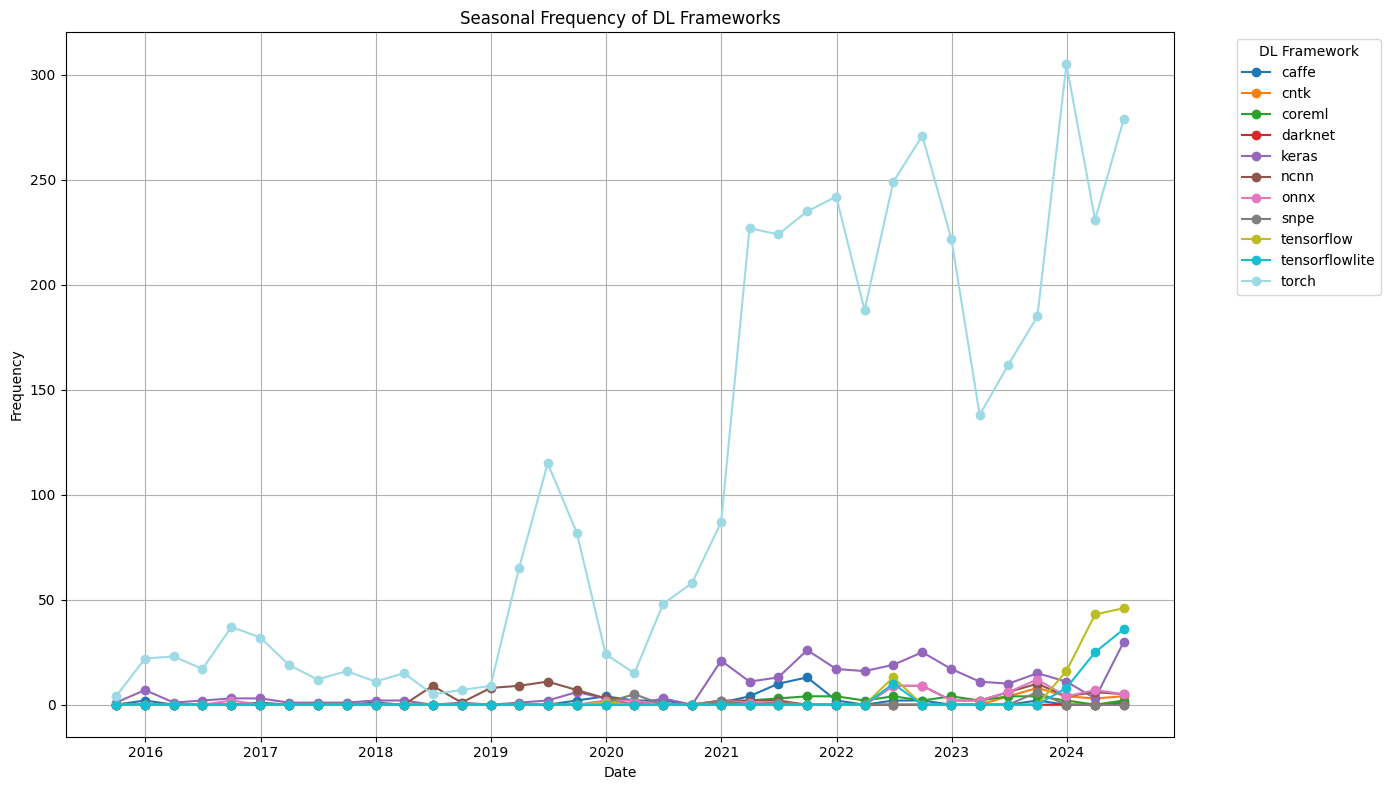

In [51]:
import numpy as np
import matplotlib.pyplot as plt
monthly_counts = dl_data.groupby([pd.Grouper(key='date', freq='Q'), 'DL_framework']).size().unstack(fill_value=0)
cmap = plt.get_cmap('tab20')  # 'tab20' supports up to 20 unique colors

# Assuming 'monthly_counts' is already computed
plt.figure(figsize=(14, 8))  # Set the figure size for better readability
frameworks = monthly_counts.columns
colors = cmap(np.linspace(0, 1, num=len(frameworks)))  # Generate colors from the colormap

for i, framework in enumerate(frameworks):
    plt.plot(monthly_counts.index, monthly_counts[framework], marker='o', label=framework, color=colors[i])

plt.title('Seasonal Frequency of DL Frameworks')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='DL Framework', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust subplot params for better layout
plt.show()

In [60]:
dl_data.to_csv('data/cleaned_data/dl_data.csv')